In [1]:
import aocd
from aocd.models import Puzzle
from aocd import submit

In [2]:
current_day = 14
current_year = 2022
puzzle = Puzzle(year=current_year, day=current_day)
puzzle

<Puzzle(2022, 14) at 0x7fc74e7090a0 - Regolith Reservoir>

In [3]:
import numpy as np
from itertools import product
import math
import matplotlib.pyplot as plt
%matplotlib inline

## Part 1



In [4]:
test_input = '''498,4 -> 498,6 -> 496,6
503,4 -> 502,4 -> 502,9 -> 494,9'''

In [5]:
test = 0

In [6]:
if test:
    input_data = test_input
else:
    input_data = puzzle.input_data

489 573 13 158
(160, 575)


(488.0, 574.0)

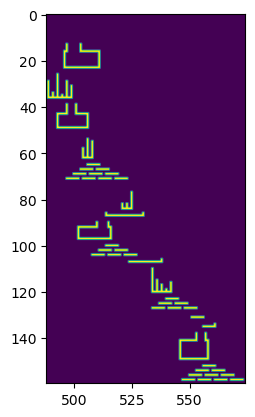

In [7]:
min_x = math.inf
min_y = math.inf
max_x = -math.inf
max_y = -math.inf
for line in input_data.splitlines():
    coords = np.array([list(map(int,coord.split(','))) for coord in line.split(' -> ')])
    min_x = min(min_x,min(coords[:,0]))
    min_y = min(min_y,min(coords[:,1]))
    max_x = max(max_x,max(coords[:,0]))
    max_y = max(max_y,max(coords[:,1]))
    
grid = np.zeros((max_y+2,max_x+2))
print(min_x, max_x, min_y, max_y)
print(grid.shape)

source = (500,0)

for line in input_data.splitlines():
    coords = [list(map(int,coord.split(','))) for coord in line.split(' -> ')]
    for (start_x, start_y), (stop_x, stop_y) in zip(coords[:-1],coords[1:]):
        start_x, stop_x = min(start_x, stop_x), max(start_x, stop_x)
        start_y, stop_y = min(start_y, stop_y), max(start_y, stop_y)
        for x, y in product(range(start_x, stop_x+1), range(start_y, stop_y+1)):
            grid[y,x] = 1 # rock
plt.imshow(grid)
plt.xlim([min_x-1,max_x+1])

overflowing
763


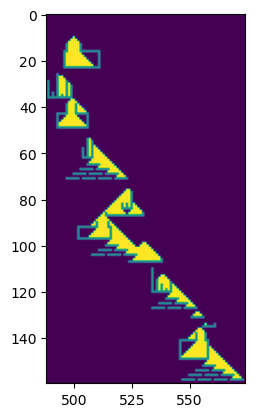

In [8]:
# cont = True
# while cont:
while True:
    # new grain is generated at source
    sand = list(source)
    while sand[1]<grid.shape[0]-1:
        if grid[sand[1]+1,sand[0]] == 0: # if it can move down
            sand[1] += 1
        elif grid[sand[1]+1,sand[0]-1] == 0: # if it can move down and left
            sand[1] += 1
            sand[0] -= 1
        elif grid[sand[1]+1,sand[0]+1] == 0: # if it can move down and right
            sand[1] += 1
            sand[0] += 1
        else: # stop
            break
    if sand[1] == grid.shape[0]-1:
        print("overflowing")
        break
    grid[sand[1],sand[0]] = 2
    


plt.imshow(grid)
plt.xlim([min_x-1,max_x+1])
print(np.count_nonzero(grid==2))

In [9]:
puzzle.answer_a = np.count_nonzero(grid==2)
puzzle.answer_a

'763'

## Part 2



489 573 13 158
(161, 1004)


(488.0, 574.0)

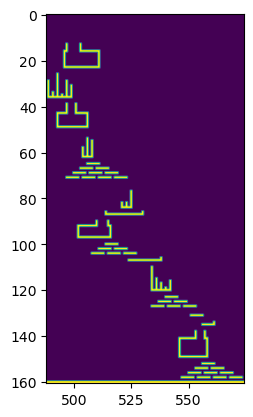

In [10]:
source = (500,0)

min_x = math.inf
min_y = math.inf
max_x = -math.inf
max_y = -math.inf
for line in input_data.splitlines():
    coords = np.array([list(map(int,coord.split(','))) for coord in line.split(' -> ')])
    min_x = min(min_x,min(coords[:,0]))
    min_y = min(min_y,min(coords[:,1]))
    max_x = max(max_x,max(coords[:,0]))
    max_y = max(max_y,max(coords[:,1]))
    
extra_y = 2
grid = np.zeros((max_y+extra_y+1,2*(source[0]+2)))
print(min_x, max_x, min_y, max_y)
print(grid.shape)


for line in input_data.splitlines():
    coords = [list(map(int,coord.split(','))) for coord in line.split(' -> ')]
    for (start_x, start_y), (stop_x, stop_y) in zip(coords[:-1],coords[1:]):
        start_x, stop_x = min(start_x, stop_x), max(start_x, stop_x)
        start_y, stop_y = min(start_y, stop_y), max(start_y, stop_y)
        for x, y in product(range(start_x, stop_x+1), range(start_y, stop_y+1)):
            grid[y,x] = 1 # rock
grid[-1,:] = 1
plt.imshow(grid)
plt.xlim([min_x-1,max_x+1])

23921


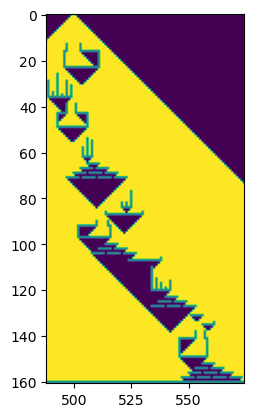

In [11]:
# cont = True
# while cont:
while True:
    # new grain is generated at source
    sand = list(source)
    while sand[1]<grid.shape[0]-1:
        if grid[sand[1]+1,sand[0]] == 0: # if it can move down
            sand[1] += 1
        elif grid[sand[1]+1,sand[0]-1] == 0: # if it can move down and left
            sand[1] += 1
            sand[0] -= 1
        elif grid[sand[1]+1,sand[0]+1] == 0: # if it can move down and right
            sand[1] += 1
            sand[0] += 1
        else: # stop
            break
    if sand[1] == grid.shape[0]-1:
        print("overflowing")
        break
    grid[sand[1],sand[0]] = 2
    if sand == list(source):
        break
    


plt.imshow(grid)
plt.xlim([min_x-1,max_x+1])
print(np.count_nonzero(grid==2))

In [12]:
puzzle.answer_b = np.count_nonzero(grid==2)
puzzle.answer_b

'23921'